In [8]:
import yfinance as yf

In [9]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

In [10]:
stock = "AAPL"
apple_data = yf.download(stock, start, end, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [11]:
apple_data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2005-07-11,1.145064,1.360714,1.380357,1.349286,1.370357,388788400
2005-07-12,1.149272,1.365714,1.371429,1.353929,1.365357,387038400
2005-07-13,1.152578,1.369643,1.375000,1.353571,1.367500,684835200
2005-07-14,1.224708,1.455357,1.500357,1.436786,1.456786,2096060400
2005-07-15,1.248752,1.483929,1.484643,1.445000,1.463214,687682800
2005-07-18,1.246948,1.481786,1.503571,1.477500,1.478929,586297600
2005-07-19,1.298041,1.542500,1.543929,1.466786,1.482857,671062000
2005-07-20,1.311264,1.558214,1.564286,1.523214,1.530714,453395600


In [12]:
apple_data.shape


(5030, 6)

In [13]:
apple_data.describe()


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5.030000e+03
mean,56.825425,58.723760,59.315205,58.073273,58.676173,3.662498e+08
std,67.769688,67.792359,68.463345,67.037394,67.715649,3.835755e+08
min,1.145064,1.360714,1.371429,1.349286,1.365357,2.323470e+07
25%,7.750372,9.210000,9.283036,9.102411,9.207589,9.427325e+07
50%,24.379133,27.000000,27.233750,26.725000,27.002501,2.028470e+08
75%,89.789417,92.369373,93.063751,90.960627,91.791876,5.292658e+08
max,258.396667,259.019989,260.100006,257.630005,258.190002,3.372970e+09


In [14]:
apple_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5030 entries, 2005-07-11 to 2025-07-08
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  5030 non-null   float64
 1   (Close, AAPL)      5030 non-null   float64
 2   (High, AAPL)       5030 non-null   float64
 3   (Low, AAPL)        5030 non-null   float64
 4   (Open, AAPL)       5030 non-null   float64
 5   (Volume, AAPL)     5030 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.1 KB


In [15]:
apple_data.isna().sum()


,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [16]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Closing price of Apple data')

<Figure size 1500x500 with 0 Axes>

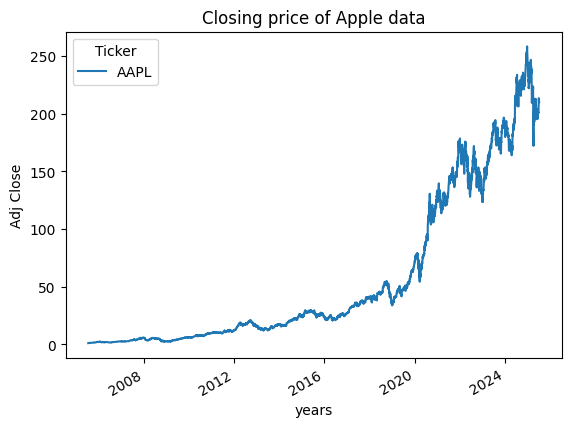

In [17]:
plt.figure(figsize = (15,5))
apple_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Apple data")


In [18]:
def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Apple data")
    plt.tight_layout()

In [19]:
apple_data.columns


MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

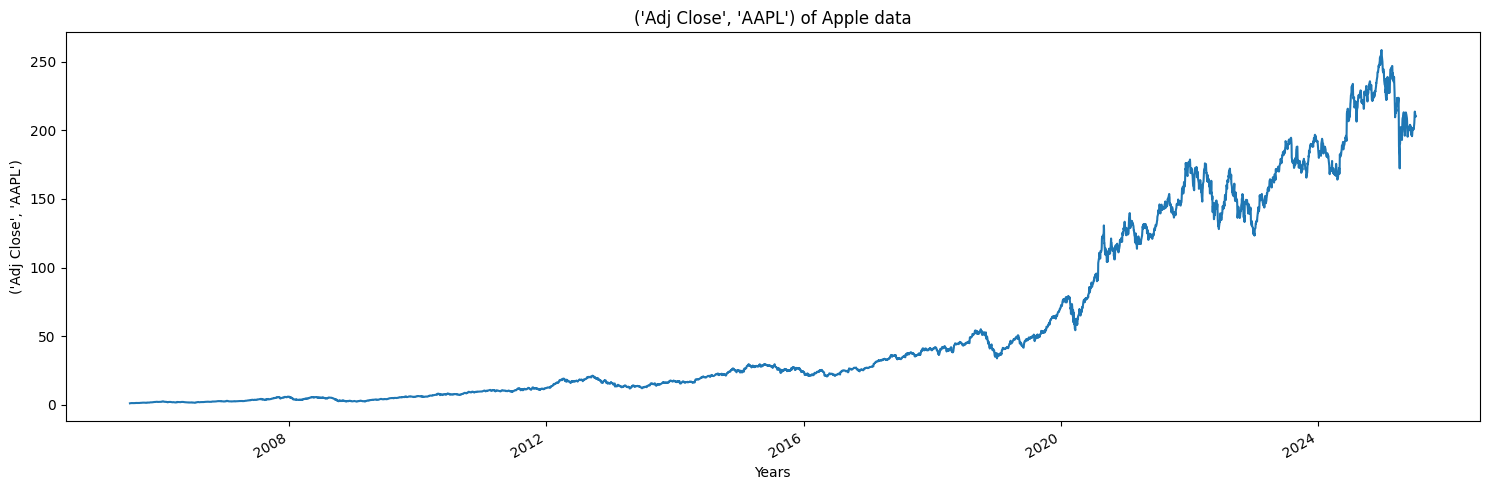

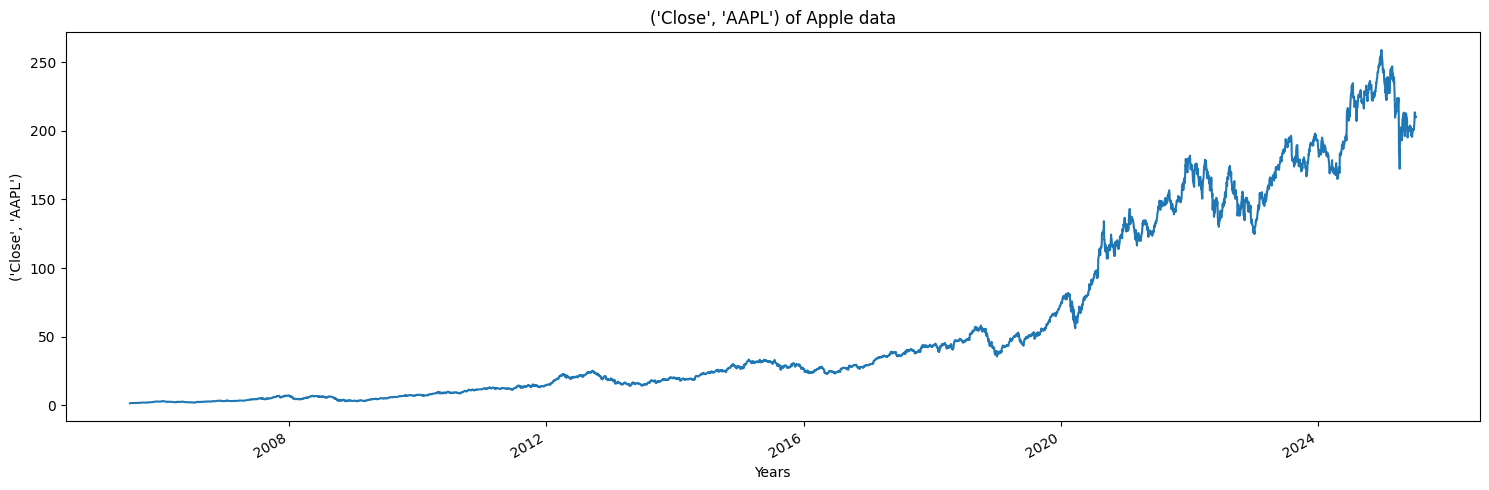

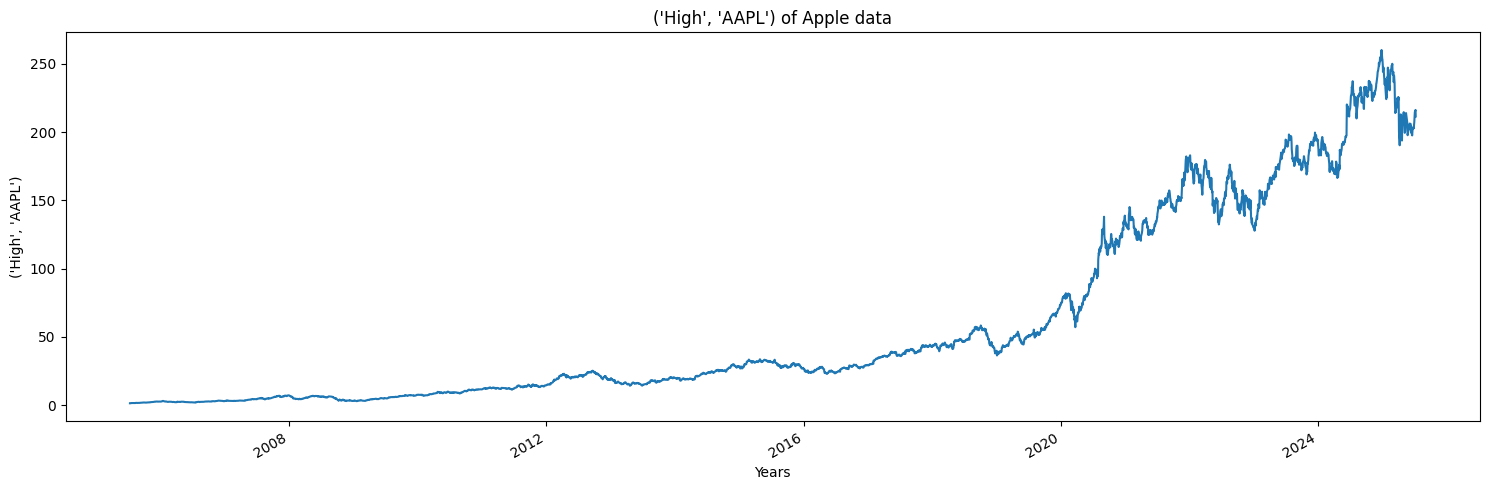

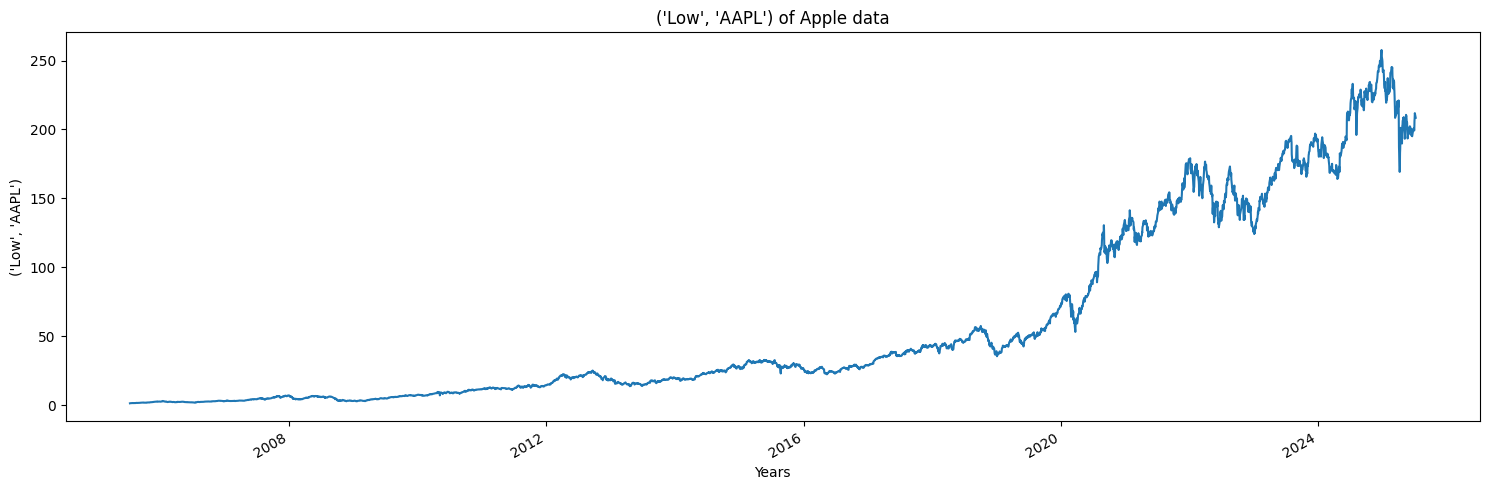

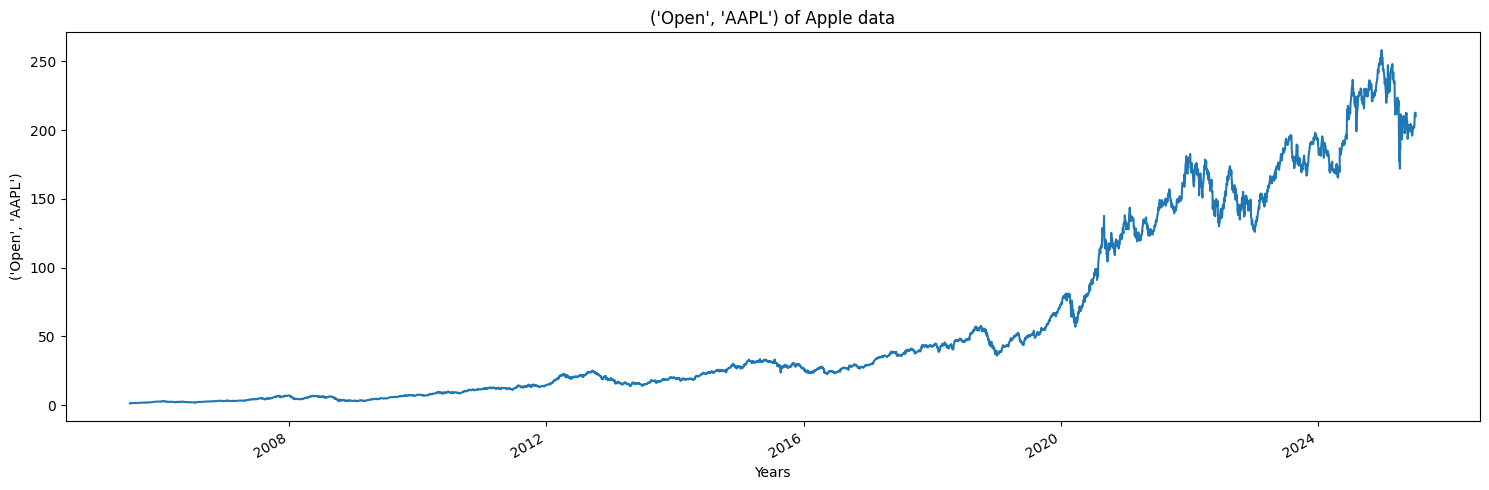

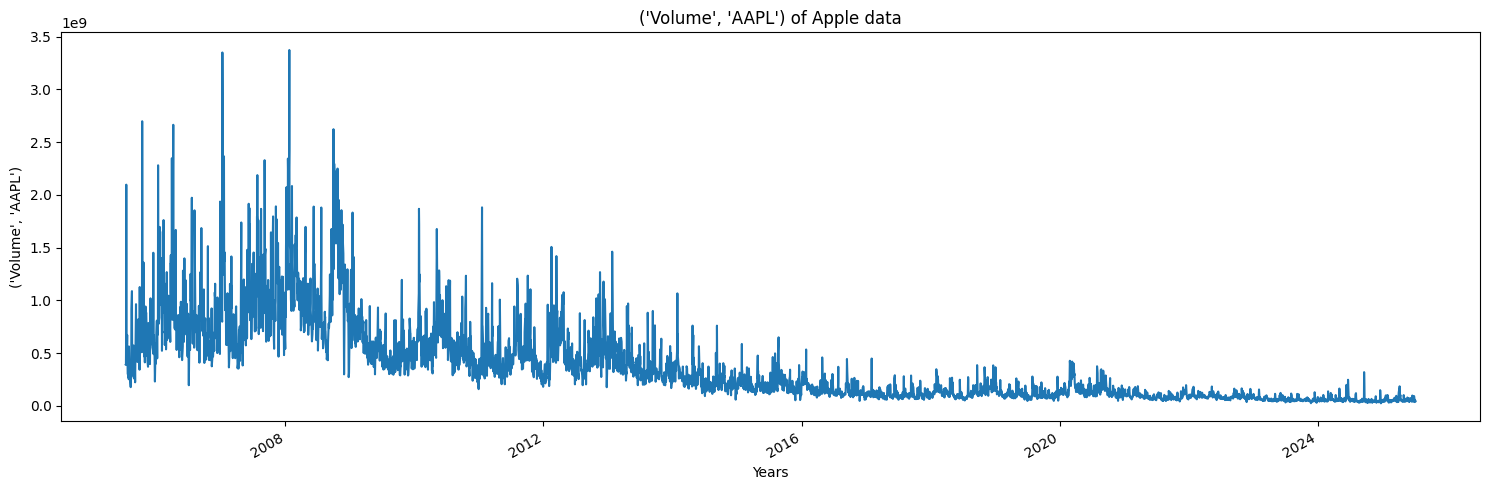

In [20]:
for column in apple_data.columns:
    plot_graph((15, 5), apple_data[column], column)

In [21]:
apple_data['MA_for_250_days'] = apple_data['Adj Close'].rolling(250).mean()


In [22]:
apple_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2006-06-29,NaN
2006-06-30,NaN
2006-07-03,NaN
2006-07-05,NaN
2006-07-06,1.83851


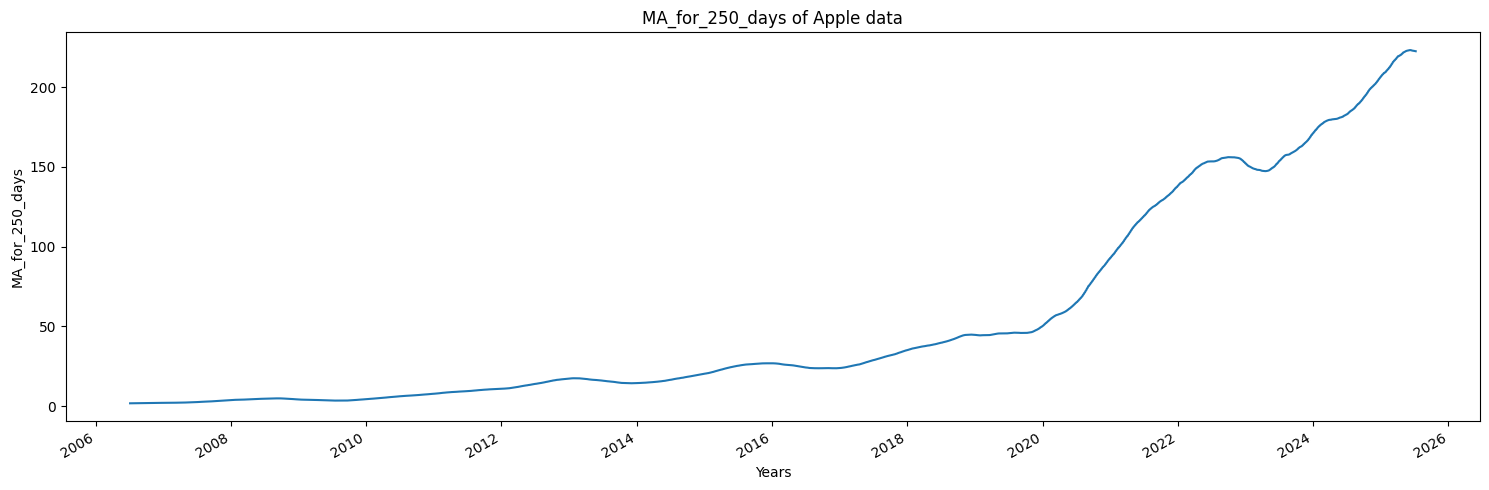

In [23]:
plot_graph((15,5), apple_data['MA_for_250_days'], 'MA_for_250_days')


<Figure size 1500x500 with 0 Axes>

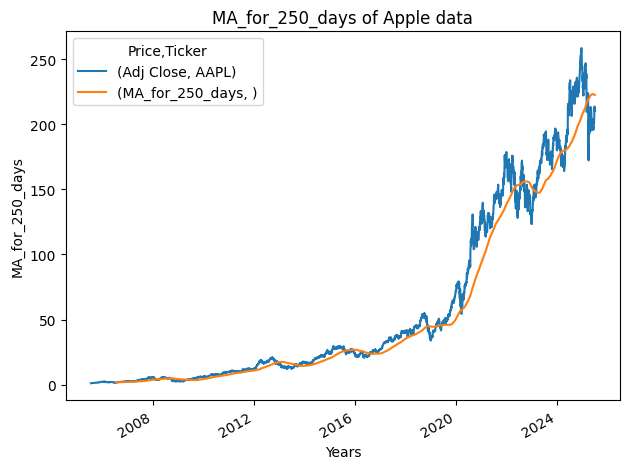

In [24]:
plot_graph((15,5), apple_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')


<Figure size 1500x500 with 0 Axes>

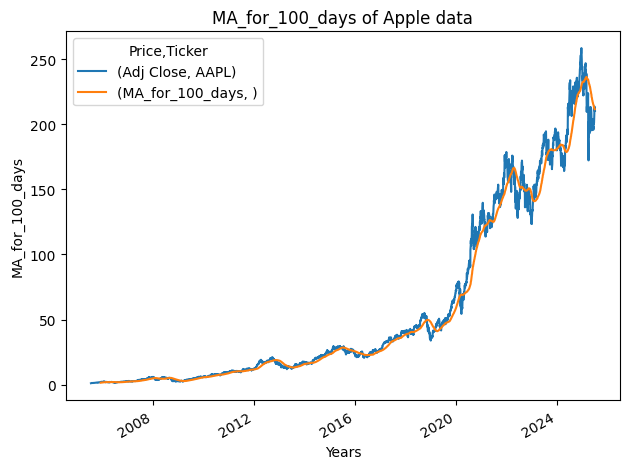

In [25]:
apple_data['MA_for_100_days'] = apple_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), apple_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 1500x500 with 0 Axes>

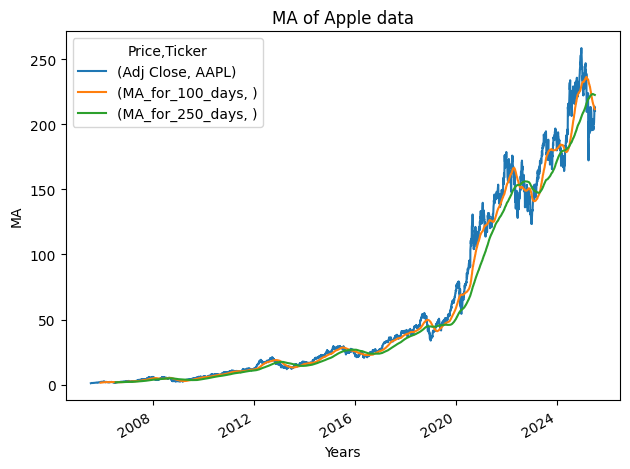

In [26]:
plot_graph((15,5), apple_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')


In [27]:
apple_data['percentage_change_cp'] = apple_data['Adj Close'].pct_change()
apple_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,AAPL,
Date,,
2005-07-11,1.145064,NaN
2005-07-12,1.149272,0.003675
2005-07-13,1.152578,0.002876
2005-07-14,1.224708,0.062582
2005-07-15,1.248752,0.019633


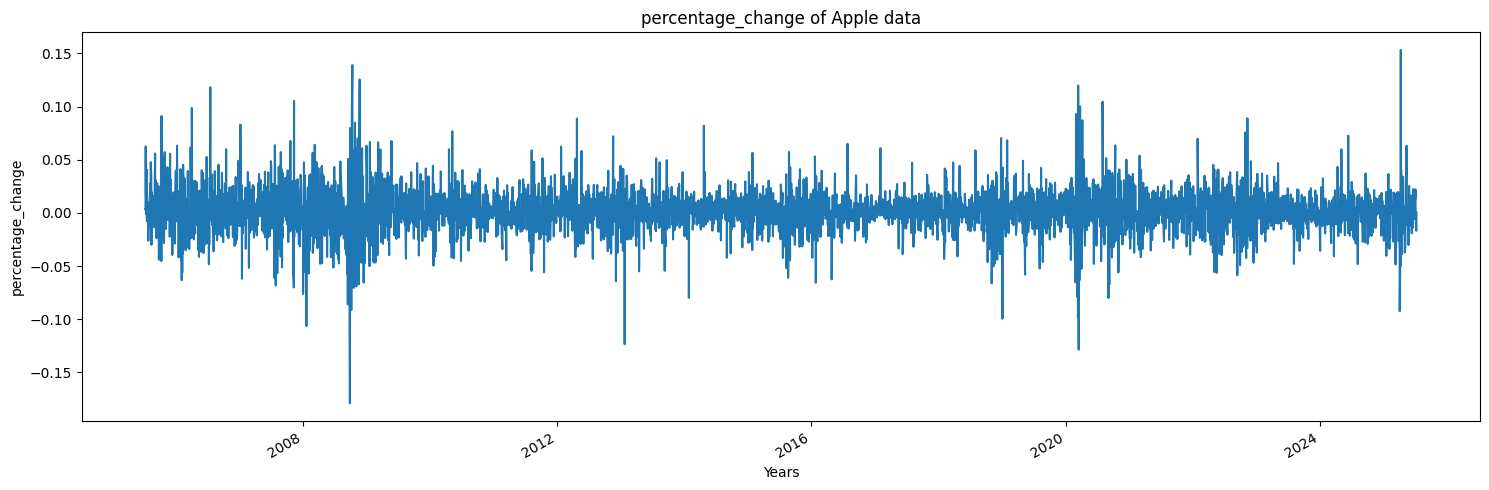

In [28]:
plot_graph((15,5), apple_data['percentage_change_cp'], 'percentage_change')


In [29]:
Adj_close_price = apple_data[['Adj Close']]


In [30]:
max(Adj_close_price.values),min(Adj_close_price.values)


(array([258.39666748]), array([1.145064]))

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00000000e+00],
       [1.63578686e-05],
       [2.92078316e-05],
       ...,
       [8.25670030e-01],
       [8.11675924e-01],
       [8.11909149e-01]])

In [32]:
len(scaled_data)


5030

In [33]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [34]:
x_data[0],y_data[0]


(array([[0.00000000e+00],
        [1.63578686e-05],
        [2.92078316e-05],
        [3.09595138e-04],
        [4.03060662e-04],
        [3.96049485e-04],
        [5.94657643e-04],
        [6.46059812e-04],
        [6.06338458e-04],
        [6.89288144e-04],
        [6.67091490e-04],
        [6.46059812e-04],
        [6.88116216e-04],
        [6.65922806e-04],
        [5.31568634e-04],
        [5.43253620e-04],
        [5.94657643e-04],
        [5.98160451e-04],
        [5.38577494e-04],
        [5.71289060e-04],
        [5.31568634e-04],
        [6.68257393e-04],
        [6.16854761e-04],
        [6.89288144e-04],
        [9.34627906e-04],
        [1.11921232e-03],
        [9.52150751e-04],
        [1.05729616e-03],
        [9.57990464e-04],
        [9.03082243e-04],
        [9.07755588e-04],
        [8.92565477e-04],
        [8.96072919e-04],
        [9.29952243e-04],
        [8.92565477e-04],
        [9.04250927e-04],
        [9.89533346e-04],
        [1.02692058e-03],
        [9.5

In [35]:
int(len(x_data)*0.7)


3451

In [36]:
5030-100-int(len(x_data)*0.7)


1479

In [37]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1479, 100, 1)
(1479, 1)


In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [40]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [42]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)


Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 263s 75ms/step - loss: 1.4638e-04
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 262s 75ms/step - loss: 3.0622e-05


In [43]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [44]:
predictions = model.predict(x_test)


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step


In [45]:
predictions

array([[0.1779509 ],
       [0.18011546],
       [0.18170595],
       ...,
       [0.7075909 ],
       [0.71596485],
       [0.71426904]], dtype=float32)

In [46]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 46.923218],
       [ 47.480053],
       [ 47.88921 ],
       ...,
       [183.17395 ],
       [185.32817 ],
       [184.89192 ]], dtype=float32)

In [47]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 50.70773697],
       [ 50.71014404],
       [ 51.25976562],
       ...,
       [213.55000305],
       [209.94999695],
       [210.00999451]])

In [48]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))


In [49]:
rmse

np.float64(18.56012168562102)

In [50]:
import pandas as pd
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = apple_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-08-19,50.707737,46.923218
2019-08-20,50.710144,47.480053
2019-08-21,51.259766,47.889210
2019-08-22,51.216381,48.296959
2019-08-23,48.849136,48.509323


<Figure size 1500x600 with 0 Axes>

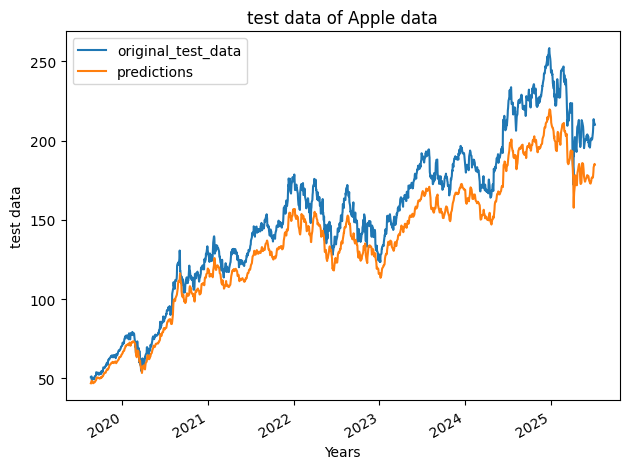

In [51]:
plot_graph((15,6), ploting_data, 'test data')


<Figure size 1500x600 with 0 Axes>

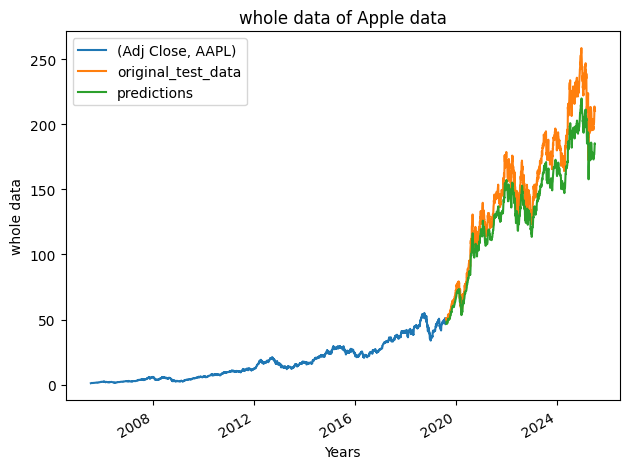

In [52]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')


In [53]:
model.save("Latest_stock_price_model.keras")


In [54]:
from google.colab import files
files.download("Latest_stock_price_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>